# America's Favorite Least and (Most) Favorite Star Wars Movies and Characters


### Introduction

Fivethirtyeight.com ran poll from June 3 to June 6, surveying 1,186 respondants to get the answers to questions such as:

- Which Star Wars characters are the most liked? Most Hated? 
- Which movies have people seen the most?
- Are there any gender related differences? 
- Are Star Wars fans likely to fans of Star Trek?

The original dataset can be found [here](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv).

Our goal was to find the highest reviewed films, the most and least favored characters, and also dive into some of the demographics behind Star Wars fans. 


### Summary

Overall, we found that people most often preferred Episode V and Episode VI. While episode II and III were the lump of coal for fans across the US.

Not so suprisingly we found that men were a little more likely(56 to 43 percent) to report as fans than women.  

Han Solo and Yoda were the most loved characters, while Jar Jar and Darth Vader the least favored. 

An interesting peculiarity was that high earners($100k+) seemed to be at least twice as likely to declare themselves as Star Wars fans vs those who didn't quite bring home as much bacon. With those earning in excess of 150k were slightly over 2.5 times more likely to classify themselves as fans.


#### Importing Our Dataset

In [1]:
import requests 
import matplotlib.pyplot as plt
import numpy as np
data = requests.get("https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv")

# open for writing
with open('StarWars.csv',"w+",encoding='utf-8') as f:
    f.write(data.text)


In [2]:
import pandas as pd
df = pd.read_csv('StarWars.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### First Impressions and Strategy

Due to the format of some of the questions, we will need to do some extensive cleaning! We've got several columns with no headers, exceedingly long column titles, and string formatted income columns.

We'll begin with cleaning our data, then explore the favorite (and least favorite) films and characters, and finally we'll dive into demographics and get into some of the demographics and quirks of our Star Wars audience. 

In [4]:
# header row holds nothing useful, let's remove it
df = df.iloc[1:] 

In [5]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

These column names are exceedingly long. We will shorten them as part of our strategy. 

### Cleaning our Dataset  
We will split off multiple columns at a time and assign them to `cleaned_df`. This allows us to work efficiently, peeling off and focusing on chunks of data at a time. We will repeat this process for the remainder of our dataset, extracting only relevant/useful data.

In [7]:
# our first two columns
cleaned_df = df[['RespondentID',
                 'Have you seen any of the 6 films in the Star Wars franchise?',
                 'Do you consider yourself to be a fan of the Star Wars film franchise?',
                ]].copy()


In [8]:
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,Yes,Yes
2,3.292880e+09,No,NaN
3,3.292765e+09,Yes,No
4,3.292763e+09,Yes,Yes
5,3.292731e+09,Yes,Yes


Our `Have you seen any of the 6 films in the Star Wars franchise?` columns contains Yes and No stored as string data types. We need to convert these to bool in order to work with them more effectively. 

In [9]:
bool_dict = {
    'Yes': True, 
    'No':False
}

In [10]:
# remap all Yes and No to bool values 
cleaned_df['Have you seen any of the 6 films in the Star Wars franchise?'] = cleaned_df['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_dict)

In [11]:
# double check our work 
cleaned_df['Have you seen any of the 6 films in the Star Wars franchise?'].dtypes

dtype('bool')

In [12]:
cleaned_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Interesting to note that 284 people do not consider themselves to be a fan of the franchise. At some point going forward we will be focusing solely on fans.

#### Column Renaming 

A peculiarity about our dataset is that responses were recorded over several columns. For example, the column `Which of the following Star Wars films have you seen? Please select all that apply.` assigns their reponses to the next five columns (`Unnamed: 4` for example) . We will have to rename all of these columns for clarity.

In [13]:
# merge in `which films have you seen` column and unnamed columns 
cleaned_df = cleaned_df.merge(df.iloc[:,3:9].copy(), left_index=True, right_index=True)

In [14]:
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,3.292763e+09,True,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,3.292731e+09,True,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [15]:
# convert columns 3:8 to bool values to simplify our analysis 
cleaned_df.iloc[:,3:9] = cleaned_df.iloc[:,3:9].notnull().copy()

In [16]:
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,Yes,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,No,True,True,True,False,False,False
4,3.292763e+09,True,Yes,True,True,True,True,True,True
5,3.292731e+09,True,Yes,True,True,True,True,True,True


`cleaned_df[3:9]` now hold boolean values. We can now change columns names to reflect whether or not respondants have seen that particular Star Wars film. For example a value of `True` under column `Unnamed:4` means they have seen 'Episode II". We now rename our columns below to clarify. 

In [17]:
# column names now reflect which film they've seen
columns = ['id',"seen_any","fan","episode_1","episode_2","episode_3","episode_4","episode_5","episode_6"]

In [18]:
cleaned_df.columns = columns

In [19]:
cleaned_df.head()

,id,seen_any,fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6
1,3.292880e+09,True,Yes,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,No,True,True,True,False,False,False
4,3.292763e+09,True,Yes,True,True,True,True,True,True
5,3.292731e+09,True,Yes,True,True,True,True,True,True


With the first half of our data cleaned and ready, we can begin our first analysis.

### Which Star Wars Films Were Seen The Most?

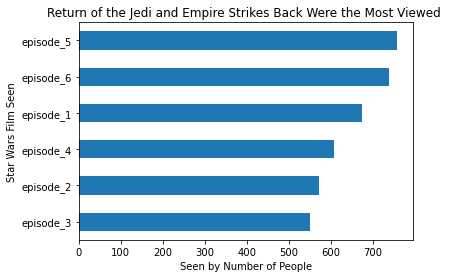

In [20]:
# we're only interested in True values for any film
film_bool = cleaned_df[cleaned_df.iloc[:,3:9] == True].copy()

# calculate the total number of True answers for each film
film_counts = film_bool.apply(pd.value_counts)

# plot our intial graph
film_counts.iloc[0,3:9].sort_values().plot(kind='barh')
plt.title("Return of the Jedi and Empire Strikes Back Were the Most Viewed ")
plt.ylabel('Star Wars Film Seen')
plt.xlabel('Seen by Number of People')
plt.show()


### Which Films Were Most Liked and Disliked? 
Participants were asked to rate the Star Wars franchise films based on a 1 to 6 scale with 1 being the most preferred and 6 being the least. 

We will summarize the results below.

Using the same strategy we will merge in our columns and rename our headers. We will name our ranking columns `rank_1`, `rank_2` for least and most favorite films. 

In [21]:
# merge in new columns
cleaned_df = cleaned_df.merge(df.iloc[:,9:15], left_index=True, right_index=True).copy()

In [22]:
# rename columns 
columns += ['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']


In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 15 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   id                                                                                                                                             1186 non-null   float64
 1   seen_any                                                                                                                                       1186 non-null   bool   
 2   fan                                                                                                                                            836 non-null    object 
 3   episode_1                   

In [570]:
cleaned_df.iloc[:,9:15] = cleaned_df.iloc[:,9:15].astype(float)

In [571]:
# create a new dataset containing the sum total of film rankings scores
film_rankings = cleaned_df.iloc[:,9:15].sum()

In [572]:
film_rankings

rank_1    3117.0
rank_2    3417.0
rank_3    3625.0
rank_4    2736.0
rank_5    2101.0
rank_6    2548.0
dtype: float64

We can now calculate and plot our ranking sums. 

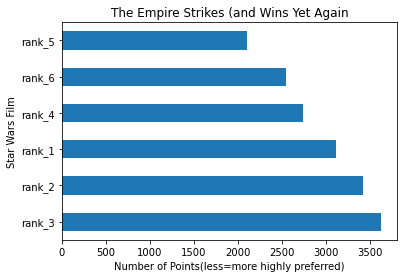

In [574]:
film_rankings.sort_values(ascending=False).plot(kind='barh')
plt.title('The Empire Strikes (and Wins Yet Again')
plt.ylabel('Star Wars Film')
plt.xlabel('Number of Points(less=more highly preferred)')
plt.show()

Since participants were asked to rate their favorite film on a scale from 1 to 6 (1 being most preferred), we can see that once again **Return of the Jedi and Empire Strikes once again, dominate**. 

In [28]:
cleaned_df.head()

,id,seen_any,fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.292880e+09,True,Yes,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,No,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,Yes,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,Yes,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


In [29]:
# too many columns, reset in case of emergency!
cleaned_df.drop(cleaned_df.iloc[:,15:55],inplace=True,axis=1)

### Who Are the Most Loved and Hated Characters?

Next we'll examine which characters which characters were most likely to be viewed as 'Very favorably' and 'Very unfavorably'. **Spoiler alert: Han Solo for the win!**

In [30]:
# merge character ratings columns from our data set
cleaned_df = cleaned_df.merge(df.iloc[:,15:29].copy(),left_index=True, right_index=True)

In [31]:
columns

['id',
 'seen_any',
 'fan',
 'episode_1',
 'episode_2',
 'episode_3',
 'episode_4',
 'episode_5',
 'episode_6',
 'rank_1',
 'rank_2',
 'rank_3',
 'rank_4',
 'rank_5',
 'rank_6']

In [32]:
# append our column names with descriptive character names
columns += ['han_solo','luke_skywalker','princess_leia','anakin_skywalker','obi_wan',
            'palpatine','darth_vader','lando','boba','c3','r2','jar_jar','padme','yoda'
           ]

In [33]:
# update our column names
cleaned_df.columns = columns

In [34]:
# we're only concerned with ratings of 'very favorably'
favorable_counts = cleaned_df.loc[:,'han_solo':'yoda'].copy().apply(pd.value_counts).loc['Very favorably',:]

In [35]:
favorable_counts.sort_values(ascending=False)

han_solo            610
yoda                605
obi_wan             591
r2                  562
luke_skywalker      552
princess_leia       547
c3                  474
darth_vader         310
anakin_skywalker    245
padme               168
lando               142
boba                138
jar_jar             112
palpatine           110
Name: Very favorably, dtype: int64

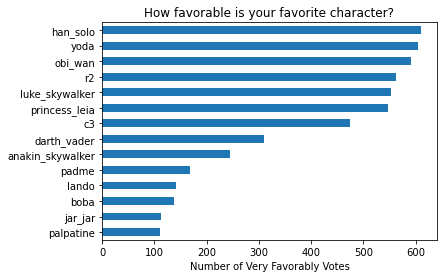

In [36]:
# sort from greatest to least and plot
favorable_counts.sort_values().plot.barh()
plt.xlabel('Number of Very Favorably Votes')
plt.title('How favorable is your favorite character?')
plt.show()


In [37]:
# we're only concerned with ratings of 'very unfavorably'
unfavorable_counts = cleaned_df.loc[:,'han_solo':'yoda'].copy().apply(pd.value_counts).loc['Very unfavorably']

In [38]:
unfavorable_counts.sort_values(ascending=False)

jar_jar             204
darth_vader         149
palpatine           124
boba                 45
anakin_skywalker     39
padme                34
lando                 8
yoda                  8
obi_wan               7
c3                    7
princess_leia         6
r2                    6
luke_skywalker        3
han_solo              1
Name: Very unfavorably, dtype: int64

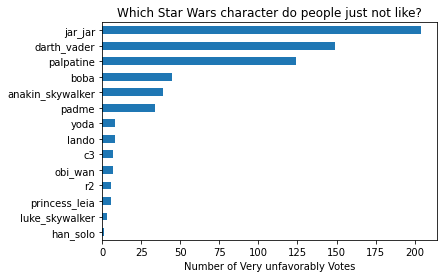

In [39]:
# sort from greatest to least and plot
unfavorable_counts.sort_values().plot.barh()
plt.xlabel('Number of Very unfavorably Votes')
plt.title('Which Star Wars character do people just not like?')
plt.show()

### Episode V Dominates Across Every US Region!

Participants were asked to rate their favorite film in the franchise with 1 being the most preferred and 6 being the least preferred. We computed the favorite film for every region and Episode V handily beat out every other film in the genre. 

In [40]:
# bring in our demographic columns(gender,age,income,education and location) (#33-37)
cleaned_df = cleaned_df.merge(df.iloc[:,33:38].copy(),left_index=True,right_index=True)



In [75]:
# rename long single column name
cleaned_df.rename(columns={'Location (Census Region)':'Location'},inplace=True)

# aggregate by location 
by_region = cleaned_df.groupby('Location')


In [76]:
# calculate sum points for each Star Wars film across each region
by_region = by_region[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].sum()

In [77]:
by_region = by_region.reset_index()

In [188]:
by_region

,Location,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
0,East North Central,499.0,546.0,591.0,450.0,318.0,410.0
1,East South Central,124.0,147.0,140.0,92.0,72.0,97.0
2,Middle Atlantic,365.0,392.0,406.0,285.0,227.0,272.0
3,Mountain,272.0,272.0,291.0,202.0,190.0,201.0
4,New England,248.0,250.0,248.0,185.0,151.0,172.0
5,Pacific,523.0,558.0,609.0,470.0,400.0,506.0
6,South Atlantic,490.0,556.0,591.0,453.0,319.0,384.0
7,West North Central,279.0,312.0,331.0,256.0,194.0,224.0
8,West South Central,258.0,313.0,340.0,278.0,184.0,223.0


In [220]:
# create a table that displays top film by region 

# select all unique column names 
cols = by_region.columns[1:]
# select all unique regions
locations = by_region['Location'].unique()

# list to hold location, movie, and rank
rank_list = []

# loop over all locations, find the minimum (=most preferred) score 
for location in locations:
    # find the lowest score for each location
    selected_row = by_region[by_region['Location'] == location]
    min_score = selected_row.min(numeric_only=True,axis=1).min()
    # loop over each column, find which column score_min came from
    for col in cols:
        # select the actual value from selected row
        score = selected_row[col].min()
        # if the score is found in the column,retain the column name
        if score == min_score:
            top_film = col        
    # update our list with region, film name, and score 
    rank_list.append([location,top_film,min_score])
    
# convert our rank list to a dataframe
rank_df = pd.DataFrame(rank_list)
# rename our columns for clarity
rank_df.columns = ['location','top_film','score']
rank_df.set_index('location',inplace=True)

# display our table
rank_df

,top_film,score
location,,
East North Central,rank_5,318.0
East South Central,rank_5,72.0
Middle Atlantic,rank_5,227.0
Mountain,rank_5,190.0
New England,rank_5,151.0
Pacific,rank_5,400.0
South Atlantic,rank_5,319.0
West North Central,rank_5,194.0
West South Central,rank_5,184.0


**Across every US region, The Empire Strikes Back(`rank_5`) is the preferred film.** 

### Are You a Star Wars Fan? High Earners Responded Yes More Frequently 
Among those earning $150,000 or more a year, **71% said they were a fan compared to 28% who said they were not.** This is the highest yes to no ratio out of all the income groups. 

In [221]:
yes_no_income = cleaned_df.groupby('Household Income')['fan'].value_counts(normalize=True)


In [222]:
yes_no_income

Household Income     fan
$0 - $24,999         Yes    0.622449
                     No     0.377551
$100,000 - $149,999  Yes    0.686957
                     No     0.313043
$150,000+            Yes    0.714286
                     No     0.285714
$25,000 - $49,999    Yes    0.571429
                     No     0.428571
$50,000 - $99,999    Yes    0.655462
                     No     0.344538
Name: fan, dtype: float64

Looking at this visually:

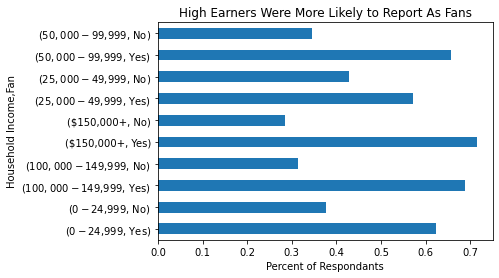

In [ ]:
yes_no_income.plot(y='Household Income',x='fan', kind='barh')
plt.title('High Earners Were More Likely to Report As Fans')
plt.xlabel('Percent of Respondants')
plt.ylabel('Household Income,Fan')
plt.show()

In [340]:
#compute ratios for each income bracket
fan_income_ratio = {'0-24k':0,
                    '100k-149k':0,
                    '150k+':0,
                    '25k-49k':0,
                    '50k-99k':0,
                   }
                    
i=0
for bracket in fan_income_ratio: 
    ratio = yes_no_income[i] / yes_no_income[i+1]
    fan_income_ratio[bracket] = ratio
    i += 2
    
# convert to a panda series for plotting
fan_income_ratio = pd.Series(fan_income_ratio)

In [342]:
fan_income_ratio

0-24k        1.648649
100k-149k    2.194444
150k+        2.500000
25k-49k      1.333333
50k-99k      1.902439
dtype: float64

Text(0.5, 1.0, 'Ratio of Fans to Non-Fans by Income Bracket')

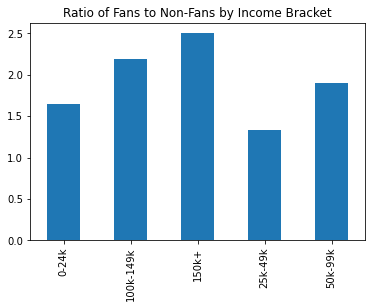

In [341]:
fan_income_ratio.plot(kind='bar')
plt.title('Ratio of Fans to Non-Fans by Income Bracket')

As we see from then graphs above, those earning 100-149k were 2.19 times as likely to say they were fans than non-fans, and **those earning 150k+ were 2.5 times as likely to say they were fans than non-fans.**

### Were Men or Women More Likely to Consider Themselves Fans? 

In [344]:
# remap our fan values to bool
cleaned_df['fan'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True,'No':False})

In [349]:
cleaned_df.groupby('fan')['Gender'].value_counts(normalize=True)

fan    Gender
False  Female    0.569892
       Male      0.430108
True   Male      0.560074
       Female    0.439926
Name: Gender, dtype: float64

56% of females and 43% of males said they were not fans. 43% of females and 56% of males said they were fans. The exact same numbers in reverse!

Men were more likely to classify themselves as fans of Star Wars.

## Which Character Was Most Favored by Fans With Graduate Level Education?

Let's dive into our the most favored film amongst fans with graduate level degrees. We saw from earlier that Episode V dominates among fans overall, but will this change as education level increases?

Let's find out!

# isolate fans with graduate degrees
graduate_fans = cleaned_df[(cleaned_df['Education'] == 'Graduate degree') & (cleaned_df['fan']==True)]

In [475]:
# isolate 'very favorable' rankings, and apply value_counts() to each column
very_favorably_counts = graduate_fans[graduate_fans.loc[:,'han_solo':'yoda'] == 'Very favorably'].apply(pd.value_counts)

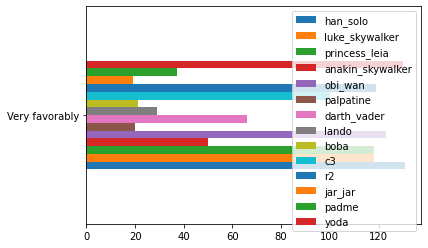

In [498]:
very_favorably_counts.loc[:,'han_solo':'yoda'].plot(kind='barh')
plt.show()

As we can see this graph is way too crowded and not very helpful. Let's look at our numbers. 

In [500]:
very_favorably_counts.loc[:,'han_solo':'yoda']

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,palpatine,darth_vader,lando,boba,c3,r2,jar_jar,padme,yoda
Very favorably,131,118,118,50,123,20,66,29,21,100,119,19,37,130


We can see that `han_solo` and `yoda` take the win with 131 and 130 votes, respectively. Let's take a  look, visually. 

In [539]:
favorably_dict = {}
# assign all the character column names to 'characters'
characters = very_favorably_counts.columns[15:29]
#loop over each character and extract the number of 'very favorably' votes
for char in characters:
    favorably_dict[char] = very_favorably_counts.loc['Very favorably',char]
    
favorably_votes = pd.Series(favorably_dict).reset_index()

In [540]:
favorably_votes.columns = ['Character','Very Favorable Votes']

In [567]:
favorably_votes.sort_values('Very Favorable Votes',inplace=True)

In [568]:
print('Most Favored Characters Among Graduate Degree Holders')
favorably_votes

Most Favored Characters Among Graduate Degree Holders


,Character,Very Favorable Votes
11,jar_jar,19
5,palpatine,20
8,boba,21
7,lando,29
12,padme,37
3,anakin_skywalker,50
6,darth_vader,66
9,c3,100
1,luke_skywalker,118
2,princess_leia,118


Let's create a more impactful visual to see the difference.

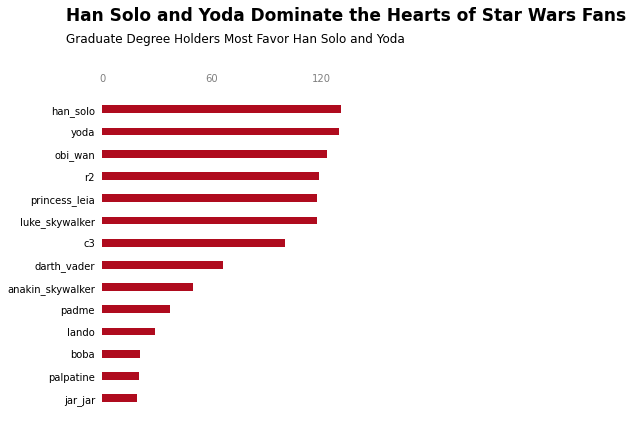

In [564]:
# mobile friendly plot
fig, axes = plt.subplots(figsize=(4.5,6))

axes.barh(favorably_votes['Character'],
          favorably_votes['Very Favorable Votes'],
          height=.35,
          color='#af0b1e')

for location in ['left', 'right', 'top', 'bottom']:
    axes.spines[location].set_visible(False)


axes.set_xticks([0,60,120])
axes.xaxis.tick_top()

axes.tick_params(top=False, left=False)
axes.tick_params(axis='x', colors='grey')

axes.text(x=-20,y=17,
        s='Han Solo and Yoda Dominate the Hearts of Star Wars Fans',
        weight='bold',
        size=17)
axes.text(x=-20,y=16,
        s='Graduate Degree Holders Most Favor Han Solo and Yoda',
        size=12)
plt.show()

We can see from the chart above that Han Solo, Yoda and Obi Wan are the most favored characters among those posessing graduate degrees or higher. 

### Are There Any Correlations to Household Income Amongst Fans?
To find out, we can convert our household incomes to a representative quantity: 1-5, and run `DataFrame.corr()` to find if there are any interesting correlations to be found. 

In [ ]:
# assign each income value a numeric weight
income_map = {
    '$150,000+': 5,
    '$100,000 - $149,999':4, 
    '$50,000 - $99,999':3, 
    '$25,000 - $49,999':2, 
    '0 - $24,999':1
}

In [ ]:
# select only fans and remap income values
cleaned_df['income_level'] = cleaned_df[cleaned_df['fan'] == True]['Household Income'].replace(income_map)

As we can see above, amongst fans, there isn't any correlation between income level and our data. 

### Do Star Wars Fans Share a Love of Star Trek? 

In [ ]:
# merge in our star trek column
fans =  fans.merge(df['Do you consider yourself to be a fan of the Star Trek franchise?'].copy(),left_index=True, right_index=True)

# rename for simplicity
fans.rename(columns={'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan'}, inplace=True)

In [ ]:
# calculate percentages for yes and no
star_trek = fans['star_trek_fan'].value_counts() / fans.shape[0]

In [ ]:
star_trek.sort_values(ascending=False)

In [ ]:
star_trek.sort_values().plot.barh()
plt.title("Star Trek Gets Love from Star Wars Fans")
plt.show()

**67% of Star Wars fans are also a fan of Star Trek.**

#### Conclusion

Overall, people love the old Star Wars movies and remakes of the old Star Wars movies. 

Episode V and VI were easily the most watched and most preferred movie out of the entire franchise. Espisode II and III were at the bottom of everyone's list. 

Men are slightly more likely to report as fans of Star Wars than women, and no matter what part of the country you're in, you'll probably argue that Episode V is the greatest film out of the entire franchise. 

When it comes to the characters, Han Solo, Yoda, and Obi-Wan dominate the hearts of Star Wars fans with graduate degrees, while Jar Jar and Darth Vader are still at the top of everyone's hate list. 

An interesting peculiarity was that high earners($100k+) seemed to be at least twice as likely to declare themselves as Star Wars fans vs those who didn't quite bring home as much bacon. Those earning in excess of 150k were slightly over 2.5 times more likely to classify themselves as fans. 

And last, 67% of Star Wars fans were also fans of Star Trek. Go figure. 